In [23]:
EXP_DIR = 'exp_2'        # Directory of the experiment containing the trained neural network to use 
N_TRIALS = 20            # Number of MCA trials to perform
MCA_TAG = 'python-numpy' # Tag of the fuzzy docker image to use (python, python-numpy, etc.). It corresponds to the use of MCA in different part of the stack 

In [24]:
import subprocess

n_existing_trials = len(exp.list(f'test_predictions_{MCA_TAG}_*'))
for _ in range(N_TRIALS - n_existing_trials):
    subprocess.run(['./predict_with_mca.sh', EXP_DIR, MCA_TAG], check=True)

In [25]:
import numpy as np
from utils import ExperimentResults

exp = ExperimentResults('exp_2')
predictions_results = np.stack([exp.load(n) for n in exp.list(f'test_predictions_{MCA_TAG}_*')])
print(f'Using data from {predictions_results.shape[0]} Monte-Carlo trials')

Using directory exp_2
Using data from 20 Monte-Carlo trials


Using (3) from https://arxiv.org/pdf/1509.01347.pdf:

Adding 1e-16 inside log10 to result in 16 significant digits (maximum with float64) when predictions_stds is null

In [26]:
predictions_means = predictions_results.mean(axis=0)
predictions_stds = predictions_results.std(axis=0)
significant_digits_base10 = -np.log10(predictions_stds/(np.abs(predictions_means)) + 1e-16)
significant_digits_base10.round().astype(int)[:5]

array([[14, 14, 14, 14, 14, 14, 14, 15, 14, 14],
       [14, 14, 15, 14, 14, 14, 14, 14, 14, 14],
       [14, 15, 14, 14, 14, 14, 14, 14, 14, 14],
       [15, 14, 14, 14, 14, 14, 14, 14, 14, 14],
       [14, 14, 14, 14, 15, 14, 14, 14, 14, 14]])

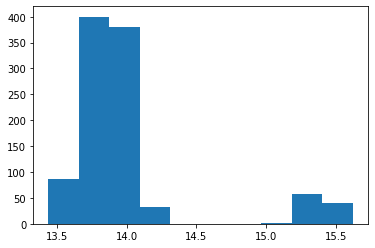

In [27]:
import matplotlib.pyplot as plt
plt.hist(significant_digits_base10.ravel());